## Avaliação da Qualidade do Ar e Poluição

<div style="text-align: center;">
  <img src="../images/poluicao.png" alt="Texto alternativo" width="800">
</div>


Nete Notebook será realizada a análise exploratória de dados (EDA) do conjunto de dados que foi obtido no **Kaggle**. O principal objetivo desse notebook é a descoberta de insights valiosos para a etapa de modelagem e aplicação de aprendizado de máquina.

---
Sobre o dataset: Este conjunto de dados concentra-se na avaliação da qualidade do ar em várias regiões. O conjunto de dados contém 5.000 amostras e captura fatores ambientais e demográficos críticos que influenciam os níveis de poluição.

Link do dataset: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

**Características Principais:**

- Temperature (°C): Temperatura média da região.
- Humidity (%): Umidade relativa registrada na região.
- PM2.5 Concentration (µg/m³): Níveis de material particulado fino.
- PM10 Concentration (µg/m³): Níveis de material particulado grosso.
- NO2 Concentration (ppb): Níveis de dióxido de nitrogênio.
- SO2 Concentration (ppb): Níveis de dióxido de enxofre.
- CO Concentration (ppm): Níveis de monóxido de carbono.
- Proximity to Industrial Areas (km): Distância para a zona industrial mais próxima.
- Population Density (people/km²): Número de pessoas por quilômetro quadrado na região.

**Variável Alvo: Níveis de Qualidade do Ar**

- Good: Ar limpo com baixos níveis de poluição.
- Moderate: Qualidade do ar aceitável, mas com alguns poluentes presentes.
- Poor: Poluição perceptível que pode causar problemas de saúde para grupos sensíveis.
- Hazardous: Ar altamente poluído, representando sérios riscos à saúde da população.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Palette Setting
color_palette = ['#333333', '#4F4F4F', '#6B6B6B', '#878787', '#A3A3A3', '#BFBFBF']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.2, 0.2, 0.2),
 (0.30980392156862746, 0.30980392156862746, 0.30980392156862746),
 (0.4196078431372549, 0.4196078431372549, 0.4196078431372549),
 (0.5294117647058824, 0.5294117647058824, 0.5294117647058824),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (0.7490196078431373, 0.7490196078431373, 0.7490196078431373)]

## 2. Compreendendo os Dados

- Este Dataset foi retirado da plataforma Kaggle: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

In [63]:
dataset = pd.read_csv("../input/data.csv", sep=',')
dataset.head(2)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate


- Temperature (°C): Temperatura média da região.
- Humidity (%): Umidade relativa registrada na região.
- PM2.5 Concentration (µg/m³): Níveis de material particulado fino.
- PM10 Concentration (µg/m³): Níveis de material particulado grosso.
- NO2 Concentration (ppb): Níveis de dióxido de nitrogênio.
- SO2 Concentration (ppb): Níveis de dióxido de enxofre.
- CO Concentration (ppm): Níveis de monóxido de carbono.
- Proximity to Industrial Areas (km): Distância para a zona industrial mais próxima.
- Population Density (people/km²): Número de pessoas por quilômetro quadrado na região.

O que iremos modelar será a variável **Air Quality**, a qual é uma variável qualitativa ordinal:
- Good: Ar limpo com baixos níveis de poluição.
- Moderate: Qualidade do ar aceitável, mas com alguns poluentes presentes.
- Poor: Poluição perceptível que pode causar problemas de saúde para grupos sensíveis.
- Hazardous: Ar altamente poluído, representando sérios riscos à saúde da população.

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


- A temperatura média observada no dataset é de cerca de 30 °C, o que indica que a predominância é de regiões que apresentam temperaturas consideradas elavadas;
- O valor mínimo observado de temperatura é de aproximadamente 13 °C, o que reforça o argumento a cima;
- Foi observado uma temperatura máxima de aproximadamente 58 °C, o que indica que possa ser um outilier, pois é algo e impossível de obter essa temperatura in natura.


In [65]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


## 3. Análise Descritiva dos Dados (EDA)

#### 3.1 Análise Univariada

Faremos o estudo descritivo univariado de algumas variáveis presentes no Dataset.

##### 3.1.1 Temperatura por Região

Podemos observar no gráfico de violino nosso boxplot e a distribuição dos dados nos quatis, onde observamos uma temperaturá média por região se concentrando entre os 20 graus a 30 graus celsius. o que indica que dentro do primeiro ao terceiro quantil temos valores consistentes. Ao observar valores a partir do terceiro quartil já observamos valores que não é normalmente visto e que chegam perto dos 60 graus, mas essas temperaturas são normalmente observadas em desertos, como o Saara.

In [66]:
dataset['Temperature'].describe().T

count    5000.000000
mean       30.029020
std         6.720661
min        13.400000
25%        25.100000
50%        29.000000
75%        34.000000
max        58.600000
Name: Temperature, dtype: float64

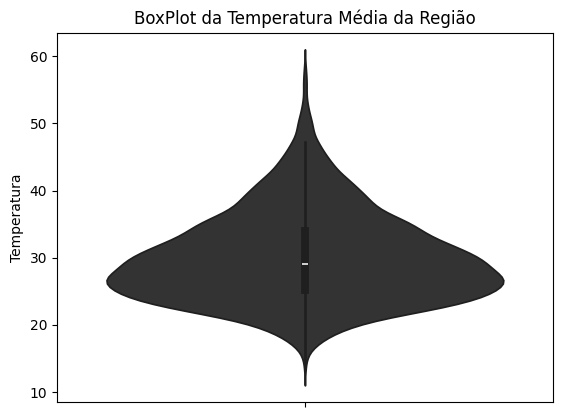

In [67]:
sns.violinplot(dataset['Temperature'])
plt.title("BoxPlot da Temperatura Média da Região")
plt.xlabel("")
plt.ylabel("Temperatura")
plt.savefig('../images/boxplot_temp.png', bbox_inches='tight')

Ao estudar o Z-Score, podemos fazer o estudo de Outliers presentes na coluna de temperatura. É uma estatística importante que expressa quantos desvios padrão um dado valor está distante da média do conjunto de dados. É dada pela seguinte equação:

$$
z =  \frac{x-\mu}{\sigma}
$$

onde,

- x é o valor individual que é analisado;
- $\mu$ é a média;
- $\sigma$ é o desvio padrão.

Se $z = 0$ significa que o valor está na média dos dados, se $z>0$ significa que o valor está acima da média, enquanto que se $z<0$ significa que o valor está abaixo da média.

Ao estudar outliers verificamos os casos em que $3<z$ e $-3>z$, quando isso acontece significa que o dado em questão será considerado um outlier.


Ao estudar o caso da temperatura, obtivemos 37 outliers, onde o valor mínimo considerado outlier foi com a temperatura 50.2 graus até a temperatura máxima observada no nosso conjunto de dados.

In [68]:
from scipy import stats

z_scores = stats.zscore(dataset['Temperature'])
outliers = (np.abs(z_scores) > 3)
outliers_df = dataset['Temperature'][outliers]
print(f"Quantidade de Outliers: {outliers_df.shape[0]}\n\
Valor mínimo: {outliers_df.min()}\n\
Valor máximo: {outliers_df.max()}\n\
Outliers Temperatura: \n{outliers_df}")

Quantidade de Outliers: 37
Valor mínimo: 50.2
Valor máximo: 58.6
Outliers Temperatura: 
29      52.5
67      58.6
249     50.9
282     54.6
294     53.1
348     50.3
826     50.4
1132    51.3
1215    53.1
1441    52.3
1450    51.1
1531    55.9
1845    56.0
1854    51.3
1855    52.7
1856    55.7
1910    52.8
2021    50.6
2114    52.3
2177    50.4
2391    56.5
2518    52.4
2533    50.7
2576    57.2
2962    50.6
2974    55.0
3009    57.8
3063    50.7
3181    56.0
3229    57.7
3240    50.4
3479    54.7
3481    50.2
3869    51.5
4517    51.4
4814    52.6
4892    50.2
Name: Temperature, dtype: float64


##### 3.1.2 Umidade relativa por Região

A umidade relativa indica quão próximo o ar está de estar completamente saturado (100%).

Em ambientes com baixa umidade, as condições podem levar a desconfortos como:
- Ressecamento da pele, olhos e mucosas.
- Sensação de secura no ambiente.
- Maior evaporação de água em superfícies e plantas.

Segundo a literatura, temos que:

**Baixa umidade (< 40%):**

- Aumenta a concentração de partículas em suspensão (PM2.5 e PM10).
- Reduz a remoção natural de poluentes, agravando a poluição atmosférica.

**Umidade moderada (40% a 60%):**

- Ideal para dispersão e remoção de poluentes.
- Melhora a qualidade do ar ao promover a deposição úmida.

**Alta umidade (> 60%):**

- Aumenta a dissolução de gases poluentes (como SO₂ e NO₂), intensificando a poluição química.
- Pode contribuir para smog em áreas urbanas e agravar a percepção de ar "pesado".



Diante disso, temos as seguintes informações que são retiradas da tabela a baixo, e visualmente do gráfico de violino:

- Umidade mínima registrada por regiões foi de 36% de umidade, o que indica baixa umidade do ar, diminuindo assim a qualidade do ar;
- A média da umidade do ar por região foi cerca de 70%, o que ultrapassa a faixa de umidade moderada, que é dita essencial para a qualidade do ar. Logo regiões que pertencem a valores da média da umidade do ar apresentam qualidade do ar ruim;
- Temos um desvio padrão de 15% da umidade do ar;
- Até 25% dos dados, estão com baixa umidade do ar, o que indica que cerca de 25% das regiões possuem tendências a terem uma qualidade do ar ruim;
- Até 50% das regiões apresentam uma umidade de até 69%, o que indica que, muitas das regiões estão com baixa umidade do ar (25%) e algumas estão com a umidade do ar moderada, isto é, com ambiente propício a uma boa qualidade do ar e algumas fora desse patamar, como a umidade elevada, que está fora do intervalo de umidade moderada.
- Até 75% das observações estão com até 80% de umidade;
- O valor máximo foi de aproximadamente 128% de umidade, o que foge do intervalo de até 100%, indicando que temos outliers, e o que é visto também pelo gráfico de violino, onde temos a presença de uma concentração pequena de observações entre 100% e o valor máximo, indicando que são outiliers e/ou valores errados.

Diante disso, faremos o estudo dos outliers, com a estatística Z-score, semelhante ao que foi realizado na subseção anterior.

In [69]:
dataset['Humidity'].describe().T

count    5000.000000
mean       70.056120
std        15.863577
min        36.000000
25%        58.300000
50%        69.800000
75%        80.300000
max       128.100000
Name: Humidity, dtype: float64

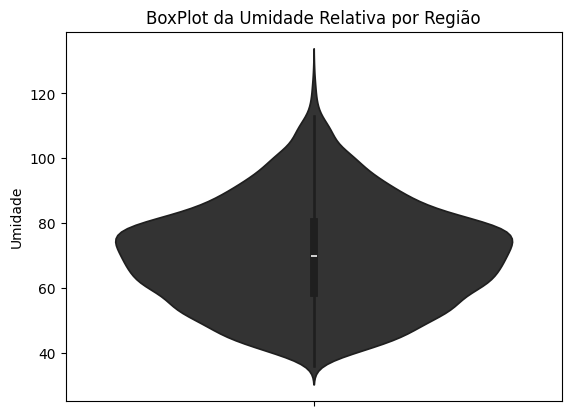

In [70]:
sns.violinplot(dataset['Humidity'])
plt.title("BoxPlot da Umidade Relativa por Região")
plt.xlabel("")
plt.ylabel("Umidade")
plt.savefig('../images/boxplot_umidade.png', bbox_inches='tight')

Obtemos uma quantidade de 8 outiliers obtidos através do Z-score, mas ao analisar valores iguais ou maiores que 100 obtemos uma quantidade significativa de dados, a qual deveremos tratar. Como a variável em questão é de suma importância na etapa de modelagem devemos fazer a limpeza desses dados. Em relação a essas informações poderíamos simplismente excluir, mas em modelagem faremos a substituição desses valores por valores condizentes, como a maioria se aproxima de 100% imputaremos esses dados errados como 100%.

In [71]:
print(dataset[dataset['Humidity'] >= 100].shape[0])
dataset[dataset['Humidity'] >= 100]

196


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
32,35.4,100.2,20.5,33.2,34.4,11.7,1.85,5.1,440,Poor
53,46.1,100.3,144.0,169.8,42.5,16.1,2.30,7.3,443,Hazardous
82,30.4,101.1,28.6,42.6,39.9,4.0,2.20,6.8,639,Poor
104,44.9,105.8,24.5,47.4,39.9,26.7,2.36,4.0,878,Hazardous
186,31.3,101.5,33.4,52.8,28.7,18.2,1.97,7.6,488,Poor
...,...,...,...,...,...,...,...,...,...,...
4865,41.6,100.7,156.7,166.2,38.7,24.5,1.96,2.8,888,Hazardous
4893,44.0,104.8,22.5,48.3,35.8,12.4,2.03,3.4,627,Hazardous
4911,33.2,109.8,94.1,111.7,46.6,7.4,3.24,3.9,853,Hazardous
4986,35.6,103.8,74.5,93.3,31.8,23.6,2.04,20.8,757,Hazardous


In [72]:
from scipy import stats

z_scores = stats.zscore(dataset['Humidity'])
outliers = (np.abs(z_scores) > 3)
outliers_df = dataset['Humidity'][outliers]
print(f"Quantidade de Outliers: {outliers_df.shape[0]}\n\
Valor mínimo: {outliers_df.min()}\n\
Valor máximo: {outliers_df.max()}\n\
Outliers Humidity: \n{outliers_df}")

Quantidade de Outliers: 8
Valor mínimo: 119.4
Valor máximo: 128.1
Outliers Humidity: 
509     120.5
2209    120.5
2278    128.1
3474    120.7
3559    119.4
3693    124.7
4275    122.3
4815    123.0
Name: Humidity, dtype: float64


##### 3.1.3 Proximity to Industrial Areas

Distância para a zona industrial mais próxima.

A variável em questão representa a distância, em quilometros, da região para a zona industrial mais próxima. Para a modelagem será uma feature interessante, pois quanto mais próximo de uma zona industrial mais a qualidade do ar tende a ser ruim. Logo é essencial tirar insights dessa variável.

Segundo a literatura, temos que:

A influência de uma indústria na qualidade do ar depende de fatores como o tipo de poluentes emitidos, condições meteorológicas e topografia. Geralmente:

- Até 5 km: Maior impacto, com alta concentração de poluentes como material particulado e gases tóxicos.
- De 5 a 20 km: Poluentes dispersos, mas ainda podem afetar áreas próximas dependendo do vento e clima.
- Acima de 20 km: Impacto reduzido, mas poluentes leves como ozônio (O₃) ou material particulado fino (PM2.5) podem se espalhar.

Observa-se no banco de dados as seguintes estatísticas dada pela tabela, e visualmente pelo gráfico de violino:

- A distância mínima observada foi de 2.5 km;
- A maior distância observada é de 25.8 km;
- Até 25% das regiões registradas tem uma distância de até 5.4 km;
- Até 50% das regiões registradas tem uma distância de até 7.9 km;
- Até 75% das regiões registradas tem uma distância de até 11.1 km;
- Temos um desvio padrão de 3.6 km de distância.

Logo, grade parte da região tem um impacto sigificativo na qualidade do ar.


In [73]:
dataset['Proximity_to_Industrial_Areas'].describe().T

count    5000.000000
mean        8.425400
std         3.610944
min         2.500000
25%         5.400000
50%         7.900000
75%        11.100000
max        25.800000
Name: Proximity_to_Industrial_Areas, dtype: float64

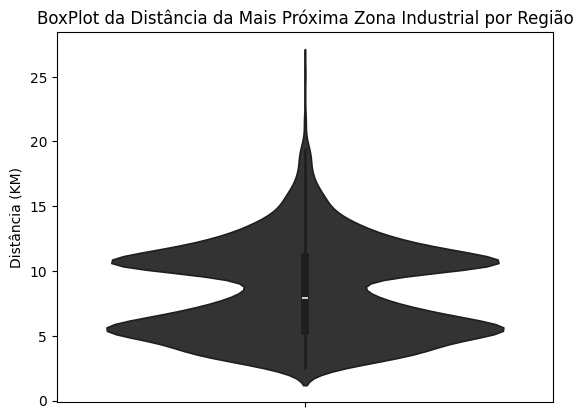

In [74]:
sns.violinplot(dataset['Proximity_to_Industrial_Areas'])
plt.title("BoxPlot da Distância da Mais Próxima Zona Industrial por Região")
plt.xlabel("")
plt.ylabel("Distância (KM)")
plt.savefig('../images/boxplot_distancia.png', bbox_inches='tight')

##### 3.1.4 Qualidade do Ar por Região

Esse é o nosso alvo da modelagem, esse que queremos fazer a previsão.

- Good: Ar limpo com baixos níveis de poluição.
- Moderate: Qualidade do ar aceitável, mas com presença de alguns poluentes.
- Poor: Poluição perceptível que pode causar problemas de saúde para grupos sensíveis.
- Hazardous: Ar altamente poluído que representa sérios riscos à saúde da população.

Diante a distribuição, temos que a maioria das regiões têm uma qualidade do ar boa, seguidade de moderada e sem seguida uma poluição visível e por último uma qualidade do ar muito ruim e extramente poluída.

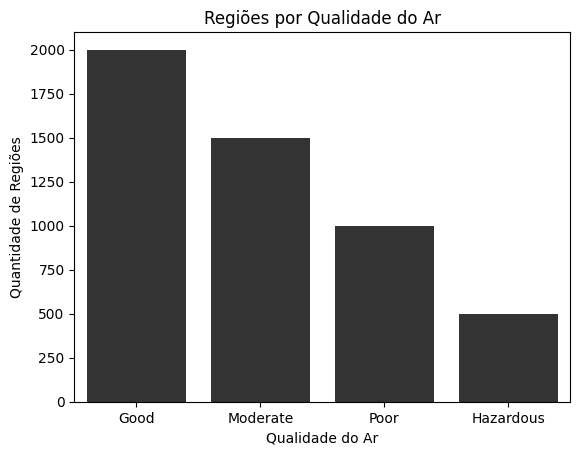

In [75]:
sns.barplot(dataset['Air Quality'].value_counts())
plt.title("Regiões por Qualidade do Ar")
plt.xlabel("Qualidade do Ar")
plt.ylabel("Quantidade de Regiões")
plt.savefig('../images/barplot_qualidade_ar.png', bbox_inches='tight')


#### 4.1 Análise Bivariada

Faremos o estudo de algumas variáveis em relação a qualidade do ar.

##### 4.1.1 (Temperatura Média por Região) por (Qualidade do Ar)

In [76]:
describe_temperatura = dataset['Temperature'].describe()
describe_temperatura

count    5000.000000
mean       30.029020
std         6.720661
min        13.400000
25%        25.100000
50%        29.000000
75%        34.000000
max        58.600000
Name: Temperature, dtype: float64

Text(0, 0.5, 'Quantidade de Regiões')

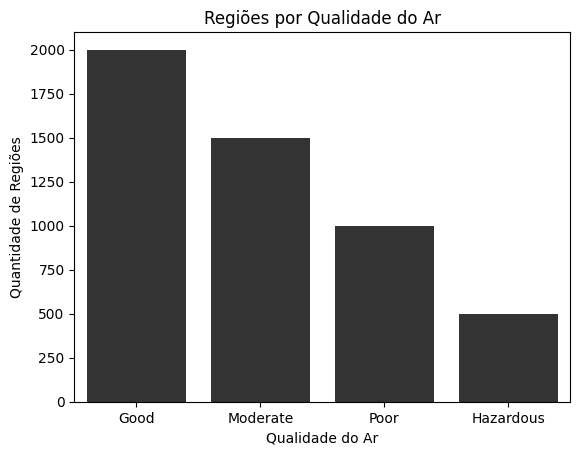

In [77]:
sns.barplot(dataset['Air Quality'].value_counts())
plt.title("Regiões por Qualidade do Ar")
plt.xlabel("Qualidade do Ar")
plt.ylabel("Quantidade de Regiões")
plt.savefig('../images/barplot_qualidade_ar.png', bbox_inches='tight')

In [78]:
Q1_temperatura = dataset[dataset['Temperature'] <= describe_temperatura['25%']]
Q2_temperatura = dataset[dataset['Temperature'] <= describe_temperatura['50%']]
Q3_temperatura = dataset[dataset['Temperature'] <= describe_temperatura['75%']]

Observa-se, que em diferentes quartis de temperatura, predomina uma qualidade do ar considerada boa, sendo que os dois primeiros quartis com uma qualidade ruim muito insiguinificante.

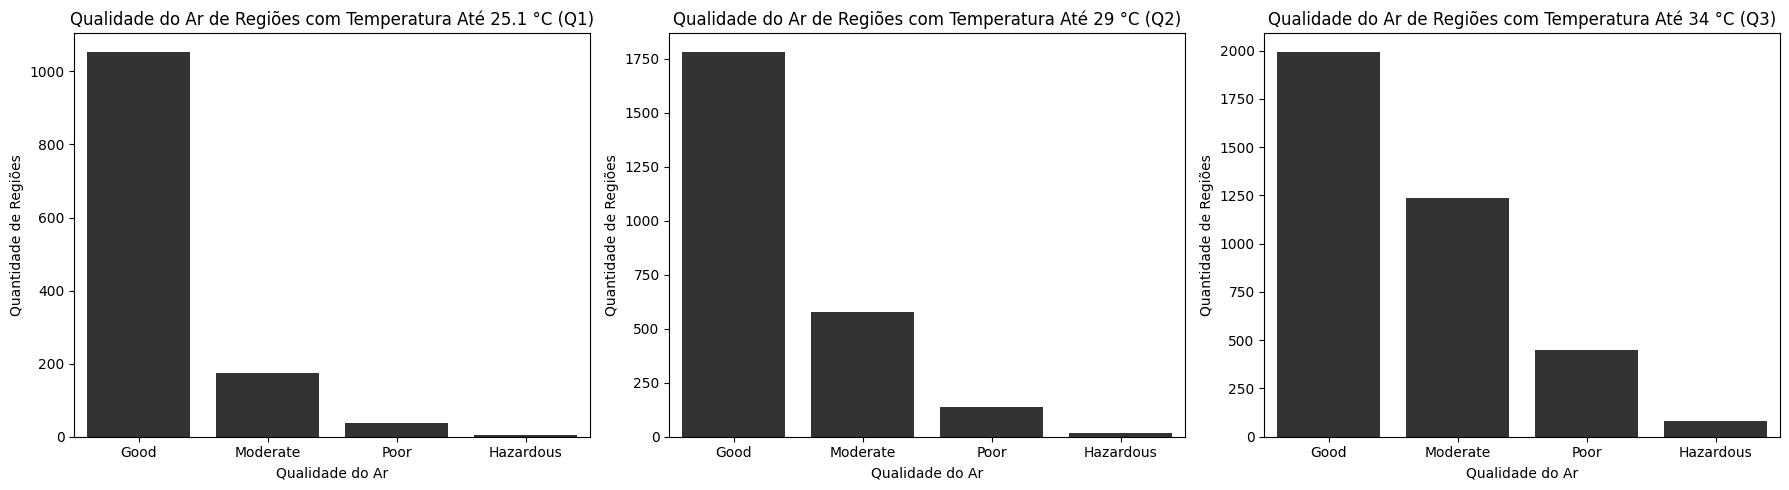

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico para o primeiro quartil (Q1)
sns.barplot(x=Q1_temperatura['Air Quality'].value_counts().index, 
            y=Q1_temperatura['Air Quality'].value_counts().values, ax=axes[0])
axes[0].set_title("Qualidade do Ar de Regiões com Temperatura Até 25.1 °C (Q1)")
axes[0].set_xlabel("Qualidade do Ar")
axes[0].set_ylabel("Quantidade de Regiões")

# Gráfico para o segundo quartil (Q2)
sns.barplot(x=Q2_temperatura['Air Quality'].value_counts().index, 
            y=Q2_temperatura['Air Quality'].value_counts().values, ax=axes[1])
axes[1].set_title("Qualidade do Ar de Regiões com Temperatura Até 29 °C (Q2)")
axes[1].set_xlabel("Qualidade do Ar")
axes[1].set_ylabel("Quantidade de Regiões")

# Gráfico para o terceiro quartil (Q3)
sns.barplot(x=Q3_temperatura['Air Quality'].value_counts().index, 
            y=Q3_temperatura['Air Quality'].value_counts().values, ax=axes[2])
axes[2].set_title("Qualidade do Ar de Regiões com Temperatura Até 34 °C (Q3)")
axes[2].set_xlabel("Qualidade do Ar")
axes[2].set_ylabel("Quantidade de Regiões")


plt.tight_layout()
plt.savefig('../images/barplot_temp_qualidade.png', bbox_inches='tight')
plt.show()

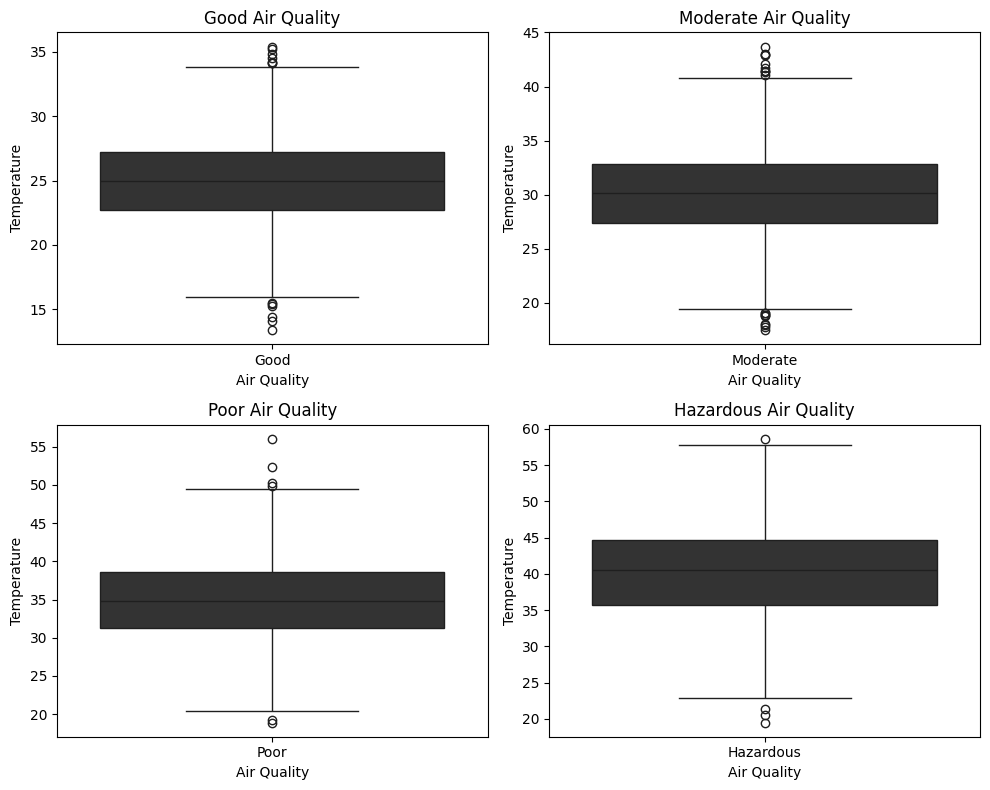

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x='Air Quality', y='Temperature', data=dataset[dataset['Air Quality'] == 'Good'], ax=axes[0, 0])
axes[0, 0].set_title('Good Air Quality')

sns.boxplot(x='Air Quality', y='Temperature', data=dataset[dataset['Air Quality'] == 'Moderate'], ax=axes[0, 1])
axes[0, 1].set_title('Moderate Air Quality')

sns.boxplot(x='Air Quality', y='Temperature', data=dataset[dataset['Air Quality'] == 'Poor'], ax=axes[1, 0])
axes[1, 0].set_title('Poor Air Quality')

sns.boxplot(x='Air Quality', y='Temperature', data=dataset[dataset['Air Quality'] == 'Hazardous'], ax=axes[1, 1])
axes[1, 1].set_title('Hazardous Air Quality')

plt.tight_layout()
plt.savefig('../images/boxplot_temp_qualidade.png', bbox_inches='tight')
plt.show()

In [81]:
# Definindo o mapeamento manual das categorias
mapping = {
    'Good': 1,
    'Moderate': 2,
    'Poor': 3,
    'Hazardous': 4
}

# Aplicando a transformação manual usando a função map
dataset['Air Quality Numeric'] = dataset['Air Quality'].map(mapping)

# Verificando as primeiras linhas do dataset com a nova coluna
print(dataset[['Air Quality', 'Air Quality Numeric']].head())

  Air Quality  Air Quality Numeric
0    Moderate                    2
1    Moderate                    2
2    Moderate                    2
3        Good                    1
4        Good                    1


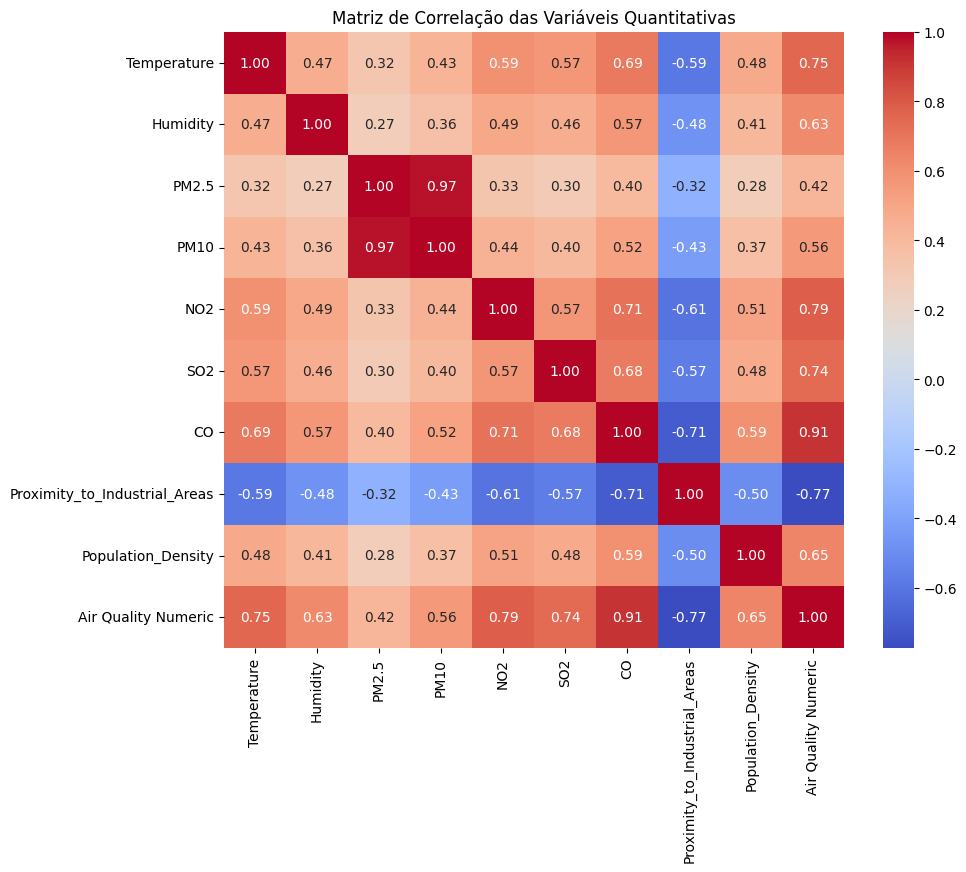

In [82]:
quantitative_data = dataset.select_dtypes(include=['number'])

# Calcular a matriz de correlação entre as variáveis quantitativas
corr = quantitative_data.corr()

# Criar o gráfico de calor
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={'size': 10})

# Ajustar título e exibir o gráfico
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.savefig('../images/mat_correlacao.png', bbox_inches='tight')
plt.show()